In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

In [2]:

file_de = "../study_opt_model_free/results_DE_90.h5"

with h5py.File(file_de, "r") as f:
    fun_de = f['best_loss'][:]
    iters_de = f['nfev'][:]
    


file_de = "../study_opt_model_free/results_CMA_ES.h5"

with h5py.File(file_de, "r") as f:
    fun_cma = f['best_loss'][:]
    iters_cma = f['nfev'][:]


In [3]:

file_grad = "../study_opt_grad_based/results_grad_100.txt"

with h5py.File(file_grad, "r") as f:
    fun_grad_init = f['fun'][:]
    iters_grad= f['iters'][:]
    params_grad = f['params'][:]


fun_grad = np.zeros_like(fun_grad_init)
fun_grad[0] = fun_grad_init[0]

for i in range(1, len(fun_grad_init)):
    fun_grad[i] = min(fun_grad[i-1], fun_grad_init[i])
    
iters_grad = np.cumsum(iters_grad)


In [4]:

file_hier = "../study_opt_hierarchical/sloppy_num_1e-3.h5"

with h5py.File(file_hier, "r") as f:
    fun_hier = f["best_loss"][:]
    iters_hier = f['iters'][:]
    type_hier = f['type'][:]


file_hier = "../study_opt_hierarchical/sloppy_1e-3_teo.h5"

with h5py.File(file_hier, "r") as f:
    fun_hier2 = f["best_loss"][:]
    iters_hier2 = f['iters'][:]
    type_hier2 = f['type'][:]




In [ ]:
print(fun_hier.shape)

(448,)


In [ ]:
print(iters_de[0])

390


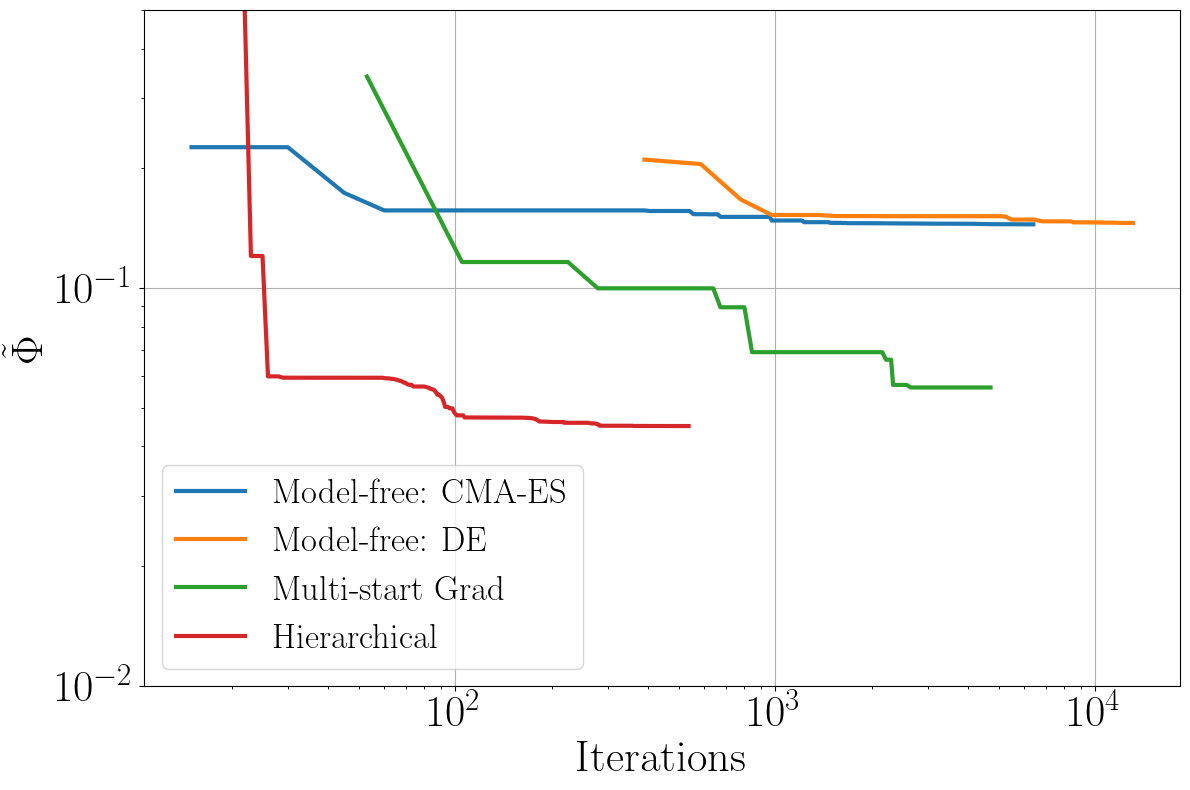

In [8]:

fig, ax = plt.subplots(figsize=(12, 8))
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
ax.plot(iters_cma, fun_cma, linewidth=3, label="Model-free: CMA-ES")
ax.plot(iters_de, fun_de, linewidth=3, label="Model-free: DE")
ax.plot(iters_grad, fun_grad, linewidth=3, label="Multi-start Grad")

shift_hier = 5
ax.plot(iters_hier[shift_hier:], fun_hier[shift_hier:], linewidth=3, label="Hierarchical")
# ax.plot(iters_hier2[shift_hier:], fun_hier2[shift_hier:], linewidth=3, label="Hierarchical")



plt.xscale('log')
plt.yscale('log')
plt.ylim(0.01, 0.5)
plt.grid()
plt.xlabel(r'Iterations', fontsize=32)
plt.ylabel(r'$\tilde{\Phi}$', fontsize=32)
ax.tick_params(axis='x', labelsize=32)
ax.tick_params(axis='y', labelsize=32)
ax.legend(fontsize=25)
plt.tight_layout()
plt.savefig("scaling_algos_optimizationV2.png")
